In [ ]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(house.shape)
house.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#전체 data를 종속변수 y와 특성변수 X의 data로 나누기
y = house['MEDV'].values
house1=house.drop(['LSTAT','INDUS','MEDV'],axis=1)
X = house1.values
#전체 data를 traning data(70%)와 test data(30%)로 나누기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#regression module 불러오기와 모형추정
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
#추정값 확인
print('Slope:' ,mlr.coef_)
print('Intercept:' ,mlr.intercept_)

Slope: [-1.66400166e-01  4.88054074e-02  2.82979861e+00 -2.44390423e+01
  5.22363873e+00 -5.32943753e-02 -1.66329755e+00  2.86895716e-01
 -1.02008472e-02 -1.10256395e+00  1.11379710e-02]
Intercept: 30.87183268606225


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


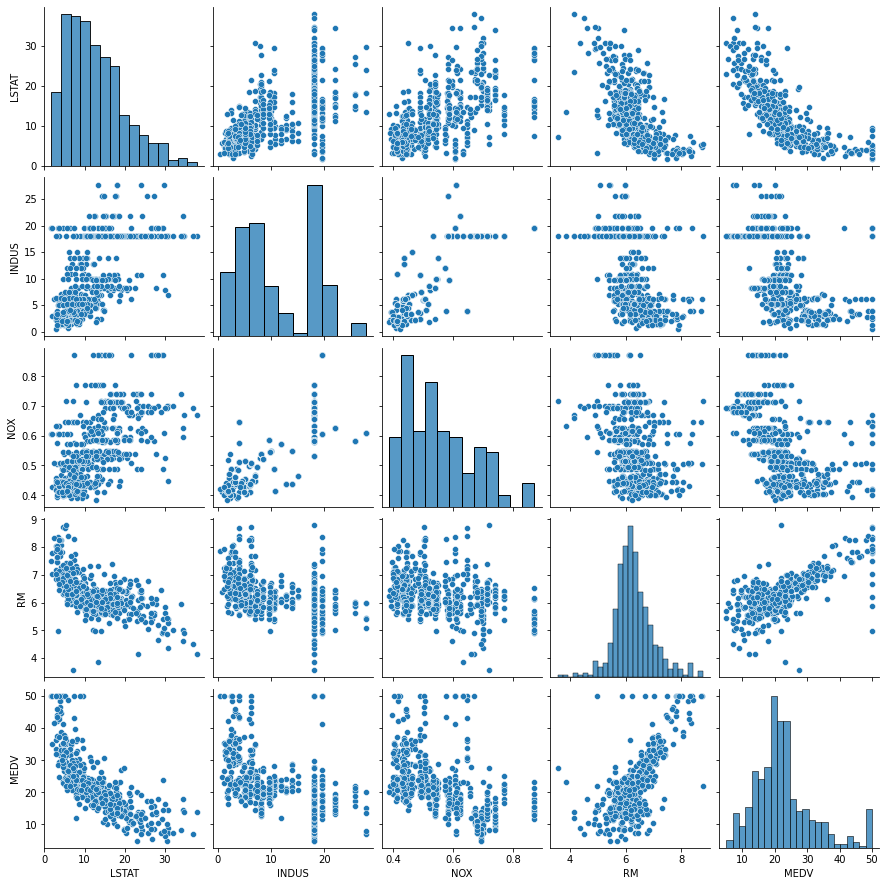

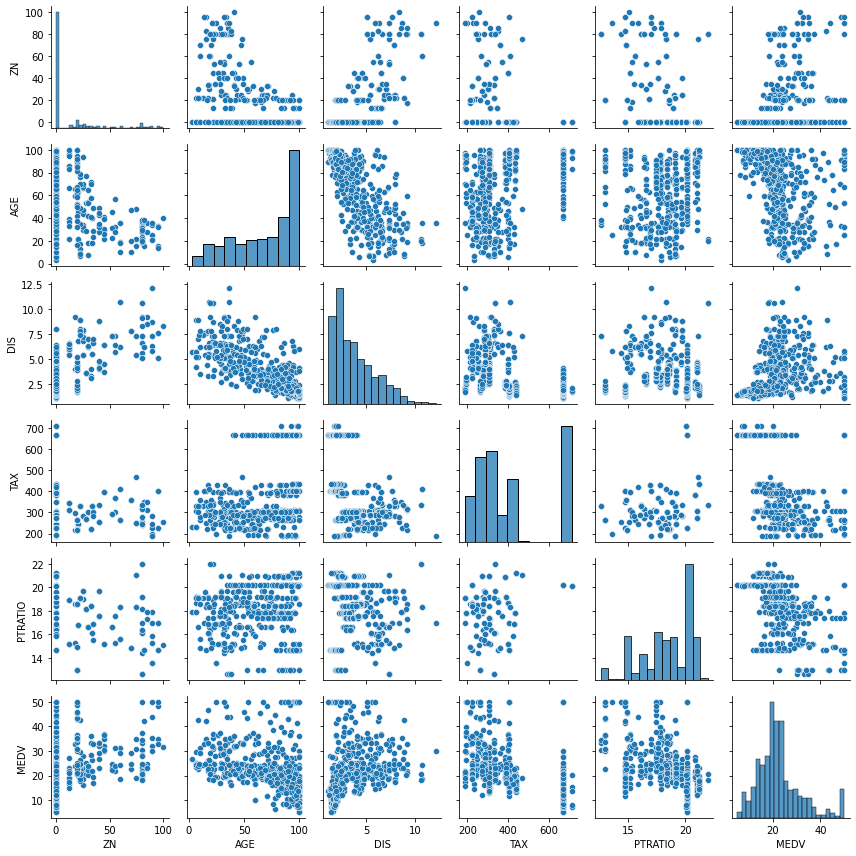

In [ ]:
#종속변수 MEDV(집가격)와 설명변수의 Plot 그리기.
import matplotlib.pyplot as plt
import seaborn as sns
col1 = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
col2 = ['ZN', 'AGE', 'DIS', 'TAX','PTRATIO', 'MEDV']
sns.pairplot(house[col1], size=2.5)
sns.pairplot(house[col2], size=2.0)
plt.tight_layout()
plt.show()

In [ ]:
#종속변수 MEDV(집가격)와 설명변수의 상관계수 행렬 구하기
import numpy as np
cm1 = np.corrcoef(house[col1].values.T)
cm2 = np.corrcoef(house[col2].values.T)
print(cm1)
print(cm2)

[[ 1.          0.60379972  0.59087892 -0.61380827 -0.73766273]
 [ 0.60379972  1.          0.76365145 -0.39167585 -0.48372516]
 [ 0.59087892  0.76365145  1.         -0.30218819 -0.42732077]
 [-0.61380827 -0.39167585 -0.30218819  1.          0.69535995]
 [-0.73766273 -0.48372516 -0.42732077  0.69535995  1.        ]]
[[ 1.         -0.56953734  0.66440822 -0.31456332 -0.39167855  0.36044534]
 [-0.56953734  1.         -0.74788054  0.50645559  0.26151501 -0.37695457]
 [ 0.66440822 -0.74788054  1.         -0.53443158 -0.23247054  0.24992873]
 [-0.31456332  0.50645559 -0.53443158  1.          0.46085304 -0.46853593]
 [-0.39167855  0.26151501 -0.23247054  0.46085304  1.         -0.50778669]
 [ 0.36044534 -0.37695457  0.24992873 -0.46853593 -0.50778669  1.        ]]


In [ ]:
#일부 변수에 대한 log 변환
import numpy as np
house['LLSTAT']=np.log(house['LSTAT'])
house['LINDUS']=np.log(house['INDUS'])
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LLSTAT,LINDUS
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1.605430,0.837248
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,2.212660,1.955860
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1.393766,1.955860
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1.078410,0.779325
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1.673351,0.779325


In [ ]:
#전체 data를 종속변수 y와 특성변수 X의 data로 나누기
y = house['MEDV'].values
house1=house.drop(['LSTAT','INDUS','MEDV'],axis=1)
X = house1.values

In [ ]:
X.shape

(506, 13)

In [ ]:
#전체 data를 traning data(70%)와 test data(30%)로 나누기 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#regression module 불러오기와 모형추정
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#추정값 확인
print('Slope:' ,mlr.coef_)
print('Intercept:' ,mlr.intercept_)

Slope: [-1.36676828e-01  3.13177997e-02  2.52393199e+00 -1.70295629e+01
  1.23977704e+00  3.06818458e-02 -1.28840466e+00  2.61968148e-01
 -6.58141653e-03 -8.27862485e-01  4.90558897e-03 -9.97211822e+00
 -6.04522425e-01]
Intercept: 65.69779117501716


In [ ]:
#예측치 구하기
y_train_pred=mlr.predict(X_train)
y_test_pred=mlr.predict(X_test)

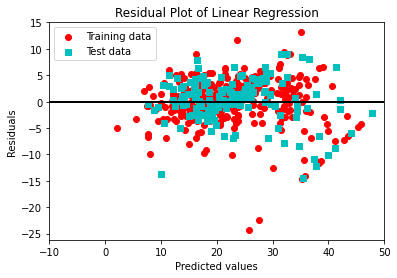

In [ ]:
#잔차에 대한 plot그리기.
plt.scatter(y_train_pred, y_train_pred - y_train,marker='o',label='Training data', color = 'r')
plt.scatter(y_test_pred, y_test_pred - y_test, marker='s', label='Test data', color = 'c')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Linear Regression')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [ ]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
# 모형의 R^2
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))

MSE train: 18.139, test: 17.416
R^2 train: 0.777, test: 0.810


In [ ]:
############## 로버스트 회귀 'RANSAC Regressor'
from sklearn.linear_model import RANSACRegressor  #RANSAC module import
rans = RANSACRegressor(max_trials=100,min_samples=45,loss='absolute_loss',residual_threshold=5.0, random_state=1)
rans.fit(X_train,y_train)
y_train_pred_rans=rans.predict(X_train)
y_test_pred_rans=rans.predict(X_test)

print(mean_squared_error(y_train, y_train_pred_rans))
print(mean_squared_error(y_test, y_test_pred_rans))

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred_rans),mean_squared_error(y_test, y_test_pred_rans)))
# 모형의 R^2
print('R^2 train: %.3f, test: %.3f' %(r2_score(y_train, y_train_pred_rans),r2_score(y_test, y_test_pred_rans)))

26.95918067741634
22.296199901347816
MSE train: 26.959, test: 22.296
R^2 train: 0.668, test: 0.757


In [ ]:
print(rans.estimator_.coef_)
print(rans.estimator_.intercept_)

[-0.33997467  0.02628575  1.26584351 -6.7774809   3.20459419 -0.03651634
 -1.13372086  0.24298439 -0.00712198 -0.59996172  0.01186441 -3.85624577
 -1.01175348]
31.427983601251846


In [ ]:
y_test_pred_rans

array([30.06820643, 26.26687165, 17.78557264, 21.63820003, 17.84923259,
       18.51057836, 30.15487931, 17.02612017, 21.62619329, 25.64702825,
       23.81177273, 28.64026773, 20.4762314 , 24.15369824, 21.09787378,
       16.11652526, 16.2733542 , 35.57516349, 27.41801495, 13.46290874,
       19.36026913, 15.13535722, 22.93973163, 24.82403277, 29.28168192,
        8.49246302, 14.36121475, 17.78088156, 32.89861388, 14.64988707,
       22.18893747, 14.87573517, 39.99096252, 16.90334436, 22.59127039,
       21.60566545, 17.43743228, 27.74786262,  6.47580878, 18.46085068,
       25.38777853, 22.508578  , 26.69069858, 16.34535436, 17.00791493,
       14.15327221, 35.69559367, 15.54910581, 20.45984628, 17.64875367,
       23.72774191, 22.59469157, 25.35400105, 21.66420883,  9.09657764,
       22.80321532, 14.51037765, 25.42988817, 17.19625044, 34.26714347,
       16.95080903, 26.30172484, 16.24270015, 15.41556365, 17.4680262 ,
       31.36535776, 36.04840172, 22.94248529, 22.24001429, 20.96

In [ ]:
y_test_pred

array([31.71742688, 27.61071152, 16.74114088, 21.81204759, 21.12049224,
       19.52329857, 32.63257293, 18.18192564, 22.86776049, 26.85861212,
       27.18370178, 30.39217161, 20.39888732, 24.54575249, 22.81572513,
       21.37927742, 15.39489385, 37.83592061, 29.51725844, 10.55428585,
       20.79106801, 16.13662779, 24.71532608, 26.22490494, 32.59191268,
       11.35896671, 13.55297716, 17.21209026, 34.65546723, 15.24200571,
       23.73852317, 13.48956832, 44.10487608, 17.03856961, 22.20972447,
       18.93968478, 16.67053192, 29.2347437 , 12.15723657, 18.81666089,
       24.99486539, 22.59101538, 29.73749252, 15.84680196, 18.13496186,
       12.86617238, 47.8206509 , 17.49160484, 25.56817376, 20.83321974,
       22.84626644, 22.38504679, 28.70269098, 25.30237538,  7.74277313,
       25.38984411, 11.43229689, 28.6750704 , 16.36456191, 37.42539763,
       18.55247276, 28.41674462, 16.42777507, 17.67720492, 10.06420299,
       34.23366601, 42.06836967, 23.07292704, 22.80502641, 24.19

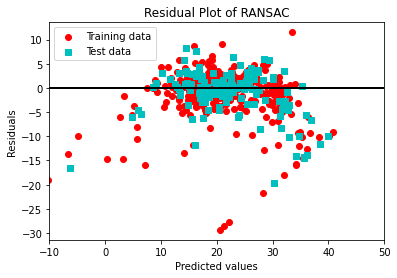

In [ ]:
#잔차에 대한 plot그리기.
plt.scatter(y_train_pred_rans, y_train_pred_rans - y_train,marker='o',label='Training data', color = 'r')
plt.scatter(y_test_pred_rans, y_test_pred_rans - y_test, marker='s', label='Test data', color = 'c')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot of RANSAC')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [ ]:
# RANSAC에서 회귀 계수를 추정하는데 사용한데이터(inner)와 특이치(outlier)출력
inlier_mask=rans.inlier_mask_
print('inner',inlier_mask)

inner [ True  True False  True False  True  True  True False False  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True False  True False  True False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True False False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True  True  True  T

In [ ]:
outlier_mask=np.logical_not(inlier_mask)
print('outlier',outlier_mask)
print(sum(outlier_mask))
print(len(outlier_mask))

outlier [False False  True False  True False False False  True  True False False
 False False False False False False False  True False False False False
 False False  True False False False False False False False False  True
 False False False False False False  True False  True False  True  True
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False  True  True False False False False  True False False False False
 False False False False False False False False False  True False False
 False False  True False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False  True False False False False  True False
 False False False False False False False 

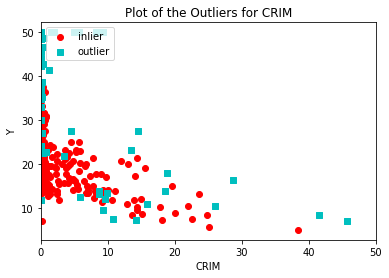

In [ ]:
plt.scatter(X_train[inlier_mask][:,0], y_train[inlier_mask], marker = 'o', label= 'inlier', color = 'r')
plt.scatter(X_train[outlier_mask][:,0], y_train[outlier_mask],marker='s', label='outlier', color = 'c')
plt.xlabel('CRIM')
plt.ylabel('Y')
plt.title('Plot of the Outliers for CRIM')
plt.legend(loc='upper left')
plt.xlim([0, 50])
plt.show()

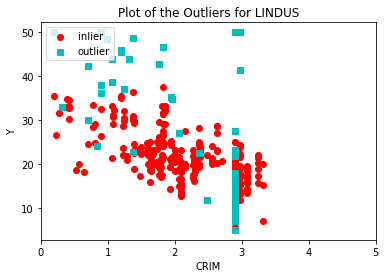

In [ ]:
plt.scatter(X_train[inlier_mask][:,12], y_train[inlier_mask], marker = 'o', label= 'inlier', color = 'r')
plt.scatter(X_train[outlier_mask][:,12], y_train[outlier_mask],marker='s', label='outlier', color = 'c')
plt.xlabel('CRIM')
plt.ylabel('Y')
plt.title('Plot of the Outliers for LINDUS')
plt.legend(loc='upper left')
plt.xlim([0, 5])
plt.show()

In [ ]:
###########SVR.Regression.....
from sklearn.svm import SVR  #SVR module import
svl=SVR(kernel='linear', C=1.0,epsilon=0.1)      #선형 SVM회귀
svl.fit(X_train,y_train)   #선형 SVM model fitting
print(len(svl.support_))
y_train_predsvl=svl.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl.predict(X_test)   #선형 SVM test set의 예측치 구하기
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)


svl1=SVR(kernel='linear', C=1.0,epsilon=1)      #선형 SVM회귀
svl1.fit(X_train,y_train)   #선형 SVM model fitting
print(len(svl1.support_))
y_train_predsvl=svl1.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl1.predict(X_test)   #선형 SVM test set의 예측치 구하기
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)

svl2=SVR(kernel='linear', C=1.0,epsilon=10)      #선형 SVM회귀
svl2.fit(X_train,y_train)   #선형 SVM model fitting
print(len(svl2.support_))
y_train_predsvl=svl2.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl2.predict(X_test)   #선형 SVM test set의 예측치 구하기
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)


svl3=SVR(kernel='linear', C=1.0,epsilon= 100)      #선형 SVM회귀
svl3.fit(X_train,y_train)   #선형 SVM model fitting
print(len(svl3.support_))
y_train_predsvl=svl3.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl3.predict(X_test)   #선형 SVM test set의 예측치 구하기
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)

344
0.7257056445901271 0.8212598208039521
22.269701769971398 16.382339448697692
268
0.7289638187200473 0.8148897036294328
22.005173664463946 16.96618927110663
20
0.6247518842054833 0.713522790997374
30.466043006974658 26.256921657491002
0
-0.3279671930675958 -0.22268614004856602
107.81641242937852 112.0646710526316


In [ ]:
print(svl.coef_)
print('INT', svl.intercept_)

[[-0.10458821  0.02278337  1.66254951 -2.28960438  3.5488695  -0.01210199
  -0.76001311  0.17584307 -0.01029869 -0.64102489  0.01212431 -5.77971117
  -0.60725402]]
INT [29.59000239]


In [ ]:
y_train_predsvl=svl.predict(X_train)   #선형 SVM traing set의 예측치 구하기
y_test_predsvl=svl.predict(X_test)   #선형 SVM test set의 예측치 구하기
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)

In [ ]:
svlscore=svl.score(X_train,y_train)   #선형 R^2 
svlscore_=svl.score(X_test,y_test)
print(svlscore, svlscore_)

0.7257056445901271 0.8212598208039521


In [ ]:
# 모형의 MSE
from sklearn.metrics import mean_squared_error
mse_l_train=mean_squared_error(y_train, y_train_predsvl)
mse_l_test=mean_squared_error(y_test, y_test_predsvl)
print(mse_l_train,mse_l_test)

22.269701769971398 16.382339448697692


In [ ]:
# 모형의 R^2
from sklearn.metrics import r2_score
R2_l=r2_score(y_train, y_train_predsvl)
R2_l_test=r2_score(y_test, y_test_predsvl)
print(R2_l,R2_l_test)

0.7257056445901271 0.8212598208039521


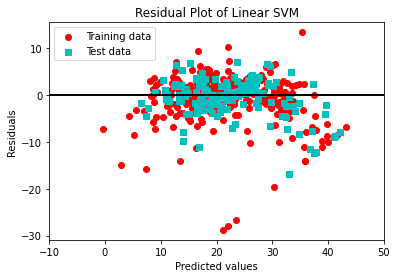

In [ ]:
#잔차에 대한 plot그리기.
plt.scatter(y_train_predsvl, y_train_predsvl - y_train,marker='o',label='Training data', color = 'r')
plt.scatter(y_test_predsvl, y_test_predsvl - y_test, marker='s', label='Test data', color = 'c')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Linear SVM')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()